In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Sales_Properties.csv")

In [3]:
df

,Date_Property_Sold,Postal_Code,Property-Price,Property_Type,Number_Bedrooms
0,2/7/2007 0:00,2607,525000,house,4
1,2/27/2007 0:00,2906,290000,house,3
2,3/7/2007 0:00,2905,328000,house,3
3,3/9/2007 0:00,2905,380000,house,4
4,3/21/2007 0:00,2906,310000,house,3
...,...,...,...,...,...
29575,7/25/2019 0:00,2900,500000,unit,3
29576,7/25/2019 0:00,2612,560000,unit,2
29577,7/26/2019 0:00,2912,464950,unit,2
29578,7/26/2019 0:00,2601,589000,unit,2


# 1.

Linear Regression

In [4]:
X = df["Number_Bedrooms"].values.reshape(-1, 1)
y = df["Property-Price"].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lin_reg.predict(X_test)

In [8]:
print(y_pred)

[574778.50189703 864921.04103187 574778.50189703 ... 429707.23232961
 574778.50189703 574778.50189703]


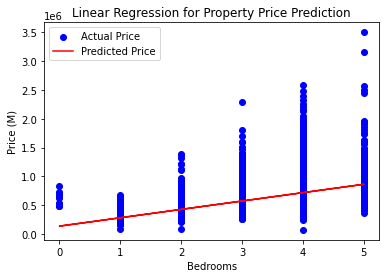

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color = "blue", label = "Actual Price")
plt.plot(X_test, y_pred, color = "red", label = "Predicted Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price (M)")
plt.title("Linear Regression for Property Price Prediction")
plt.legend()
plt.show()

In [10]:
import sklearn.metrics as sm

print("Accuracy / R^2 score =", round(sm.r2_score(y_test, y_pred), 2))

Accuracy / R^2 score = 0.25


Support Vector Machines

In [11]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
print(y_pred)

[510000 600000 510000 ... 420000 510000 510000]


In [14]:
from sklearn.metrics import accuracy_score

print("Accuracy score:", round(accuracy_score(y_test, y_pred), 2))

Accuracy score: 0.01


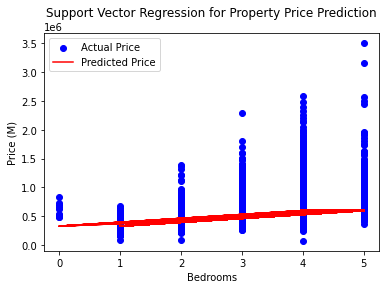

In [16]:
plt.scatter(X_test, y_test, color = "blue", label = "Actual Price")
plt.plot(X_test, y_pred, color = "red", label = "Predicted Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price (M)")
plt.title("Support Vector Regression for Property Price Prediction")
plt.legend()
plt.show()

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
print(y_pred)

[553706.57606766 932748.31829897 553706.57606766 ... 441636.50456461
 553706.57606766 553706.57606766]


In [23]:
print("Accuracy / R^2 score =", round(sm.r2_score(y_test, y_pred), 2))

Accuracy / R^2 score = 0.26


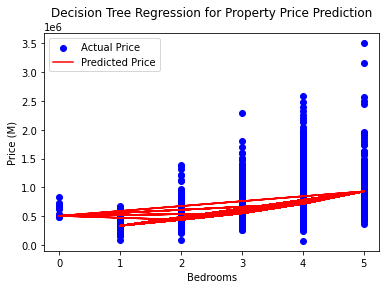

In [24]:
plt.scatter(X_test, y_test, color = "blue", label = "Actual Price")
plt.plot(X_test, y_pred, color = "red", label = "Predicted Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price (M)")
plt.title("Decision Tree Regression for Property Price Prediction")
plt.legend()
plt.show()

For question 1, I chose Linear Regression, Support Vector Regression and Decision Tree Regression.

Linear regression was used because it was a simple and easy algorithm that would help us understand the relationship between the price and the number of bedrooms. Linear regression allows us to predict the values we need out of the data. As we have learned in our second module, X is our independent variable and y is our dependent variable. The X variable helps us predict the y variable, while assuming that there is a linear relationship between X and y. X can therefore predict y by a line.

Support vector regression was used because it was another form of regression, but this is non-linear. It was used to predict the values even when the relationship between X and y was not linear, as opposed to our first example using linear regression. This type of regression was also efficient in training the large dataset we had for this example.

Decision tree regression was another easy algorithm that was used to predict values. Decision trees build tree-like decisions, where the decisions split the data into different groups. This algorithm allows us to predict the value of a new data point by following the path of the decision tree.  

Of these three types of prediction algorithms, the decision tree regression worked the best on this data. This was concluded because it had the highest accuracy score with 0.26. The accuracy score for linear regression was 0.25 and the accuracy score for SVM was 0.01. 

# 2.

In [26]:
import shap

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Resources used:
# https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

RandomForestRegressor()

In [28]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 5917it [01:16, 68.86it/s]                          


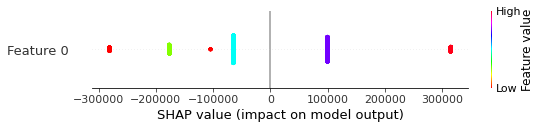

In [37]:
shap.summary_plot(shap_values, X_test, cmap='hsv')

# Resources used:
# https://stackoverflow.com/questions/60153036/changing-the-gradient-color-of-shap-summary-plot-to-specific-2-or-3-rgb-grad

# 3.

Another technique that increases transparency and interpretability of machine learning models is LIME. LIME stands for Local Interpretable Model-Agnostic Explanations. Local refers to the local fidelity, or explanation that reflects the behavior of the classifier arounf the instance we are predicitng. Interpretable means that we can makes sense of it. Model-agnostic refers to ability of lime to explain the model without the need to peak into it. These models are used to explain individuakl predictions of black box machine learning models. 

Resources:
- https://christophm.github.io/interpretable-ml-book/lime.html
- https://homes.cs.washington.edu/~marcotcr/blog/lime/
- https://datascience.stackexchange.com/questions/99827/interpretable-vs-transparent-ml-algorithms